<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b> Regresión Lineal </b>

<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> HPC Introducción 
<br>
<i><b>Estudiante:</b></i> David Zárate.
<br>
<i><b>Tema:</b></i> Tercer Parcial
<br>
21/10/22
<br>
</FONT>
</p>

#Resumen


*El desarrollo de este parcial tiene como fin poner a prueba los conocimientos obtenidos durante el tercer corte de la materia de Introduccion a HPC. Esto se hara por medio de un ejercicio de regresion lineal realizado desde Scikit-Learn y C++/Eigen. Para ello se tomo el dataset de House Price Prediction.* <br>
*Con el dataset seleccionado se hara una analitica de los datos con el fin de hacer la comparativa entre Scikit-Learn y C++/Eigen*

#Introduccion

**Regresion Lineal:** *La regresion lineal es un modelo matematico usado para aproximar la relacion de dependencia entre una variable dependiente y varias variables independientes*
<br>
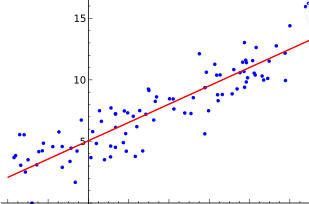

*La regresion lineal perimite trabajar con una variable a nivel intervalo o razon, esto para comprender la relacion de dos o mas variables y permitira relacionar mediante ecuaciones una variable en relacion a otras*

*El coeficiente de determinacion es un numero entre 0 y 1, el cual refleja que tanto se ajusta un modelo a la variable que se pretende predecir. Para el ejercicio se usara esta metrica con el de ver que tan bueno es el modelo*

*El dataset seleccionado es el de House Price Prediction. En este dataset se encontraran diferentes columnas las cuales seran utilizadas pora hacer el modelo de regresion lineal* <br>
*El nombre de algunas columnas no tienen mucho sentido a primera vista, por ello se hara una breve explicacion de cada una de ellas :*



*   **Price:** *El precio es el objetivo a predecir*
*   **Bedrooms:** *Numero de habitaciones*
*   **Bathrooms:** *Numero de baños*
*   **Sqft_living:** *Pies cuadrados de la casa* 
*   **Sqft_lot:** *Pies cuadrados del lote*
*   **Floors:** *Total de pisos en la casa*
*   **Waterfront:** *Casa que tiene vistas a un paseo maritimo*
*   **View:** *Se ha visto*
*   **Sqft_basement:** *Pies cuadrados del sotano*




#Modelo LR Scikit-Learn

*En el caso de este dataset se decidio utilizar unicamente las sigueintes variables ya que estas son las mas representativas:* <br>
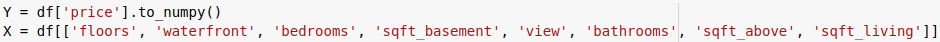

##Bibliotecas y Dataset


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sys
from io import StringIO
from sklearn.metrics import mean_squared_error

In [29]:
url = 'https://raw.githubusercontent.com/DavidZD02/Parcial_3Corte_HPC/main/kc_house_data_NaN.csv'
df = pd.read_csv(url)

In [30]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##Analisis de los datos

*Se listan la cantidad de valores NaN por columna*

In [32]:
print("Cantidad de valores null por columna : \n")
df.isnull().sum()

Cantidad de valores null por columna : 



Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

*Los valores NaN se remplazan por el promedio de su respectiva columna*

In [33]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

*Se valida que ya no estan los valores NaN*

In [34]:
print("Cantidad de valores null por columna : \n")
df.isnull().sum()

Cantidad de valores null por columna : 



Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##Organizacion, promedio y desviacion de los datos

*Se calcula el promedio de los datos*

In [35]:
print("Bedrooms : ", round(df['bedrooms'].mean(),4))
print("Bathrooms : ", round(df['bathrooms'].mean(),4))
print("Sqft_living : ", round(df['sqft_living'].mean(),4))
print("Floors : ", round(df['floors'].mean(),4))
print("Waterfront : ", round(df['waterfront'].mean(),4))
print("View : ", round(df['view'].mean(),4))
print("Ssqft_above : ", round(df['sqft_above'].mean(),4))
print("Sqft_basement : ", round(df['sqft_basement'].mean(),4))
print("Yr_built : ", round(df['yr_built'].mean(),4))
print("Price : ", round(df['price'].mean(),4))

Bedrooms :  3.3729
Bathrooms :  2.1157
Sqft_living :  2079.8997
Floors :  1.4943
Waterfront :  0.0075
View :  0.2343
Ssqft_above :  1788.3907
Sqft_basement :  291.509
Yr_built :  1971.0051
Price :  540088.1418


*Se calculan las desviaciones*

In [36]:
print("Bedrooms : ", round(df['bedrooms'].std(),4))
print("Bathrooms : ", round(df['bathrooms'].std(),4))
print("Sqft_living : ", round(df['sqft_living'].std(),4))
print("Floors : ", round(df['floors'].std(),4))
print("Waterfront : ", round(df['waterfront'].std(),4))
print("View : ", round(df['view'].std(),4))
print("Ssqft_above : ", round(df['sqft_above'].std(),4))
print("Sqft_basement : ", round(df['sqft_basement'].std(),4))
print("Yr_built : ", round(df['yr_built'].std(),4))
print("Price : ", round(df['price'].std(),4))

Bedrooms :  0.9264
Bathrooms :  0.7688
Sqft_living :  918.4409
Floors :  0.54
Waterfront :  0.0865
View :  0.7663
Ssqft_above :  828.091
Sqft_basement :  442.575
Yr_built :  29.3734
Price :  367127.1965


##Visualizacion de los datos

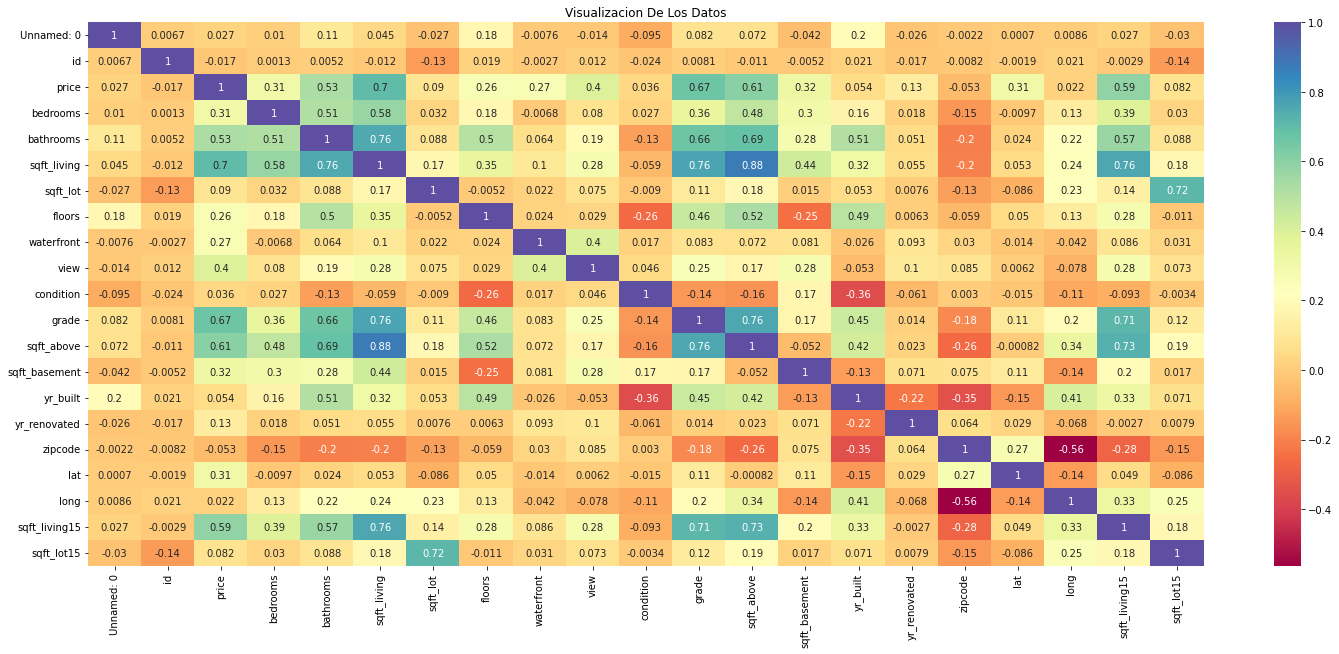

In [37]:
Matriz_Correlacion = df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(Matriz_Correlacion,annot=True, cmap='Spectral')
plt.title('Visualizacion De Los Datos')
plt.show()

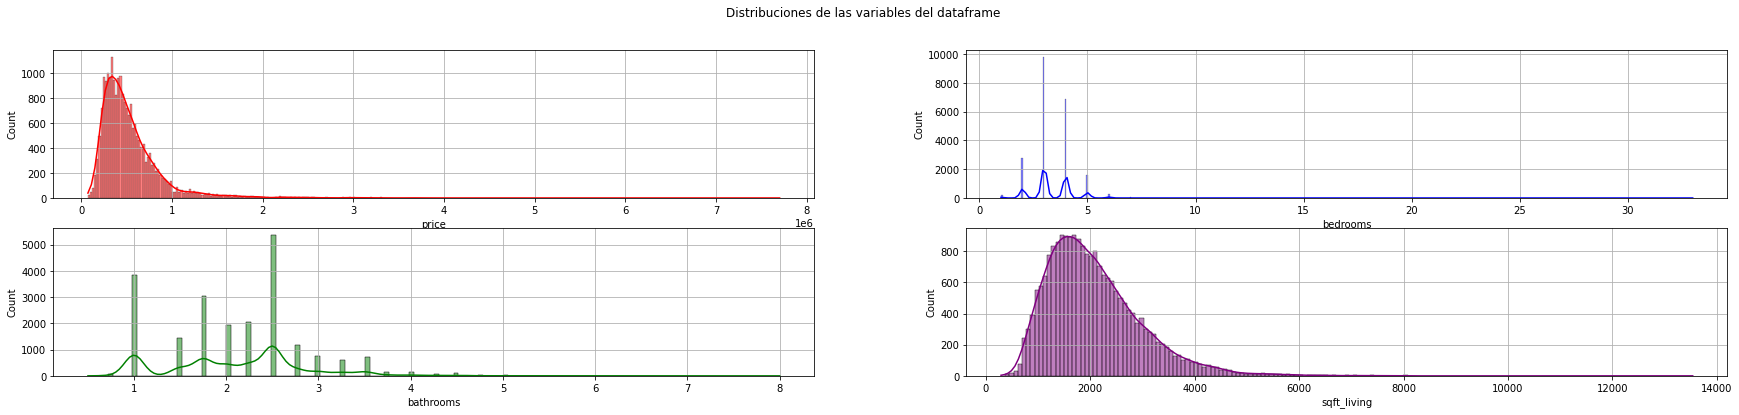

In [38]:
fig, axes = plt.subplots(2,2,figsize=(30,6))
fig.suptitle('Distribuciones de las variables del dataframe')
sns.histplot(df['price'], ax=axes[0][0], kde=True,color='red')
axes[0][0].grid()

sns.histplot(df['bedrooms'], ax=axes[0][1], kde=True,color='blue')
axes[0][1].grid()

sns.histplot(df['bathrooms'], ax=axes[1][0], kde=True,color='green')
axes[1][0].grid()

sns.histplot(df['sqft_living'], ax=axes[1][1], kde=True,color='purple')
axes[1][1].grid()

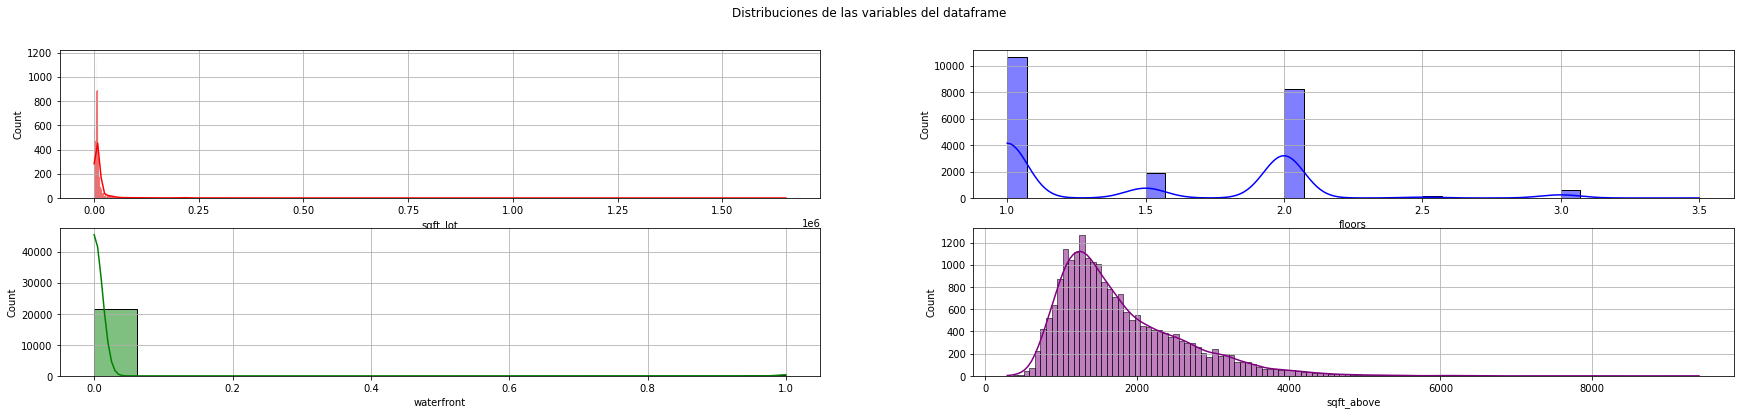

In [39]:
fig, axes = plt.subplots(2,2,figsize=(30,6))
fig.suptitle('Distribuciones de las variables del dataframe')
sns.histplot(df['sqft_lot'], ax=axes[0][0], kde=True,color='red')
axes[0][0].grid()

sns.histplot(df['floors'], ax=axes[0][1], kde=True,color='blue')
axes[0][1].grid()

sns.histplot(df['waterfront'], ax=axes[1][0], kde=True,color='green')
axes[1][0].grid()

sns.histplot(df['sqft_above'], ax=axes[1][1], kde=True,color='purple')
axes[1][1].grid()

##Regresion Lineal

In [40]:
modelo = LinearRegression()

In [41]:
Y = df['price'].to_numpy()
X = df[['floors', 'waterfront', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_above', 'sqft_living']].to_numpy()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8)

In [43]:
# A continuación se hace un pipeline para entrenar el modelo, usando la normalizacion
# z, (similar a lo elaborado en C++."Modelo artesanal de regresión lineal").
pipe = Pipeline([('scaler', StandardScaler()),('LR',LinearRegression())])
RL_train = pipe.fit(X_train, y_train)

In [44]:
modelo.fit(X_train, y_train)

LinearRegression()

In [45]:
print(modelo.coef_)

[ 2.17036598e+04  5.86228657e+05 -5.00763020e+04  8.12994606e+15
  7.22824101e+04  8.77449029e+03  8.12994606e+15 -8.12994606e+15]


**Modelo Test**

In [46]:
modelo_test = LinearRegression()

In [47]:
modelo_test.fit(X_test, y_test)

LinearRegression()

*Se presentan los coeficientes*

In [48]:
print(modelo_test.coef_)

[ 1.29839788e+04  3.87819034e+05 -3.35972969e+04 -1.18453105e+15
  7.80455717e+04  4.76167488e+03 -1.18453105e+15  1.18453105e+15]


*Se crean los vectores de prediccion de train y test*

In [49]:
predicciones_train = modelo.predict(X_train)
predicciones_test = modelo.predict(X_test)

**Se evalua el modelo con la metrica R2**

In [50]:
r2_train = modelo.score(X_train, y_train)
r2_test = modelo.score(X_test, y_test)

print("Puntaje de R2 score modelo Entrenamiento: ", r2_train)
print("Puntaje de R2 score modelo Prueba: ", r2_test)

Puntaje de R2 score modelo Entrenamiento:  0.5596895350044477
Puntaje de R2 score modelo Prueba:  0.5557195907697448


#Comparativas

*A continuacion se presentan las capturas del promedio de las variables obtenidas en C++/Eigen y Scikit-Learn*

**C++/Eigen** <br>
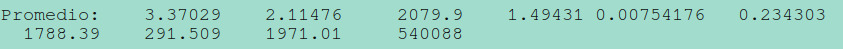 <br><br>**Scikit-Learn**<br>
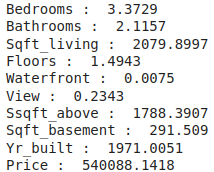

*A continuacion se presentan las capturas de la desviación de las variables obtenidas en C++/Eigen y Scikit-Learn*

**C++/Eigen** <br>
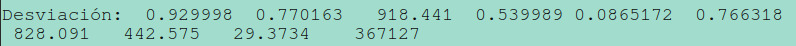 <br><br> **Scikit-Learn** <br>
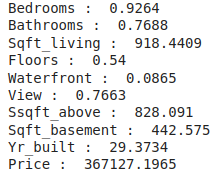

*A continuacion se presenta la normalizacion hecha en C++/Eigen*

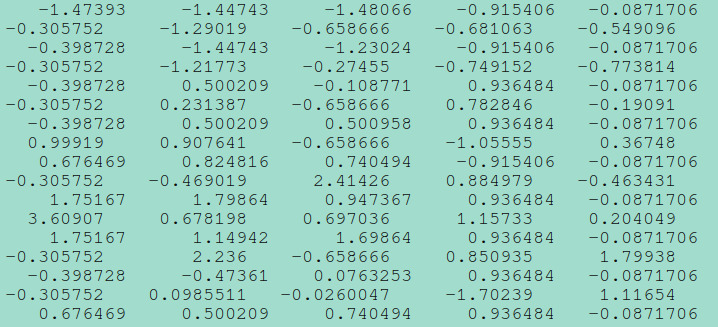

*A continuacion se presentan las capturas del puntaje R2 Score obtenidos en C++/Eigen y Scikit-Learn*

**C++/Eigen** <br>
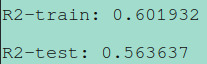 <br><br> **Scikit-Learn** <br>
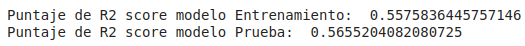

*Se importa un archivo 'csv' con los datos obtenidos en el algoritmo C++, con el fin de hacer una comparacion mas exacta por medio de una grafica*

In [51]:
url2 = 'https://raw.githubusercontent.com/DavidZD02/Parcial_3Corte_HPC/main/y_train_hat.csv'
y_hat = pd.read_csv(url2, header=None)

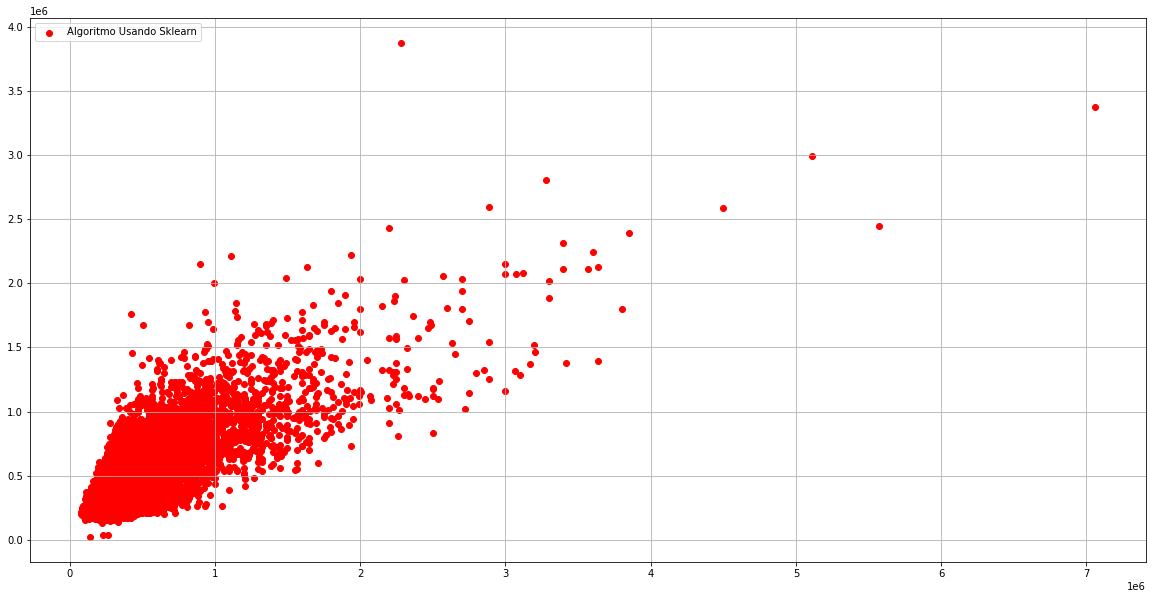

In [52]:
fig, axes = plt.subplots(figsize=(20,10))
plt.scatter(y_train[:9998], predicciones_train[:9998], color= 'r', label='Algoritmo Usando Sklearn')
#plt.scatter(y_train[:9998], y_hat, color= 'b', label='Algoritmo C++')
plt.legend(loc=2)
plt.grid()
plt.show()

#Analisis


*Como se puede observar en las capturas y en los resultados del codigo hecho por Scikit-learn el resultado de los promedios y la desviacion son muy parecidos*<br>
*En el caso del puntaje R2 hay una pequeña diferencia entre el resultado obtenido en Scikit-learn y C++/Eigen. Esto se puede dar tal vez por un calculo mal hecho en C++.*

**SI DESEA VER EL CODIGO REALIZADO EN C++/EIGEN, INGRESE AL SIGUIENTE ENLACE.**

https://github.com/DavidZD02/Parcial_3Corte_HPC.git

#Conclusiones

* *Principalmente como se puede observar en la grafica, no existe mucha diferencia entre el algoritmo utilizado en C++ y el usado por Sklearn. Esto se puede dar ya que el algoritmo realizado en C++ puede llegar a tener un error de calculo a la hora de realizar las funciones. Por el lado del programa realizado en Python este cuenta con biblotecas que son especificamente diseñadas para este tipo de algoritmos, por lo tanto estas bibliotecas llegan a tener una precision muy alta* <br>
* *Esta demostracion permite tener un mejor conocimiento de como se hace una regresion lineal desde 0, adquiriendo mas conocimiento sobre los calculos que se necesitan para llegar al mejor resultado posible*

#Referencias

*   Regresión lineal con python. (s. f.). Recuperado 20 de octubre de 2022, de https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

*   ¿Qué es la regresión lineal? (s. f.). MATLAB & Simulink. Recuperado 20 de octubre de 2022, de https://la.mathworks.com/discovery/linear-regression.html